In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

Consider the Abalone data set available at UCI ML Repository.

In [222]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url)

Change the names of the columns using the following code

In [223]:
df.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
le = LabelEncoder()
le.fit(df["Sex"])
list(le.classes_)
le.transform(df["Sex"])
df["Sex"] = le.transform(df["Sex"])
# 0 = Female, 1 = I, 2 = Male

X = df.loc[:, df.columns != "Rings"]
y = df["Rings"]

The goal of this homework is to use K-Nearest Neighbors Regressor to predict the number of
rings `df["Rings"]` (target variable) using the features given. Note that one of the features
is categorical and you can choose to drop it or to encode it numerically.

You can either use the code we created from scratch and modify it for this problem or you can use `sklearn KNeighborsRegressor`.

Divide the data set into subsets for training and testing.

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

Since this is a regression problem, the appropriate error functions you may use are MSE,
MAE, and RMSE. Consider several different choices of the hyper-parameter K and see how
the error changes with respect to K.

Use GridSearchCV to select the optimal values of K (and maybe other hyper-parameters)
and report the model performance.

Before we get started building the model, I'm going to standardize the data. The data seems to be nearly the same scale throughout the regressors, but it seems good practice for KNN.

In [225]:
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

Now, we will use GridSearch Cross Validation to find the optimal hyper-parameters

In [226]:
knn = KNeighborsRegressor()
#create a dictionary of all values we want to test for n_neighbors and p norms
param_grid = {"n_neighbors": np.arange(1, 25), "p": [1,2], "weights": ["uniform", "distance"]}
#use gridsearch to test all values for n_neighbors and norms
knn_gscv = GridSearchCV(knn, {"n_neighbors": range(1, 26), 
                              "p": [1,2], 
                              "weights": ["uniform", "distance"]}, 
                              cv=5)
#fit model to data
knn_gscv.fit(X_train_standardized, y_train)
#check top performing n_neighbors/norm values
knn_gscv.best_params_
# knn_gscv.best_score_

{'n_neighbors': 24, 'p': 2, 'weights': 'distance'}

In the interest of completeness/visualization: we will graph the RMSE of each iteration of k, from 1 to 25.

Text(0, 0.5, 'MSE')

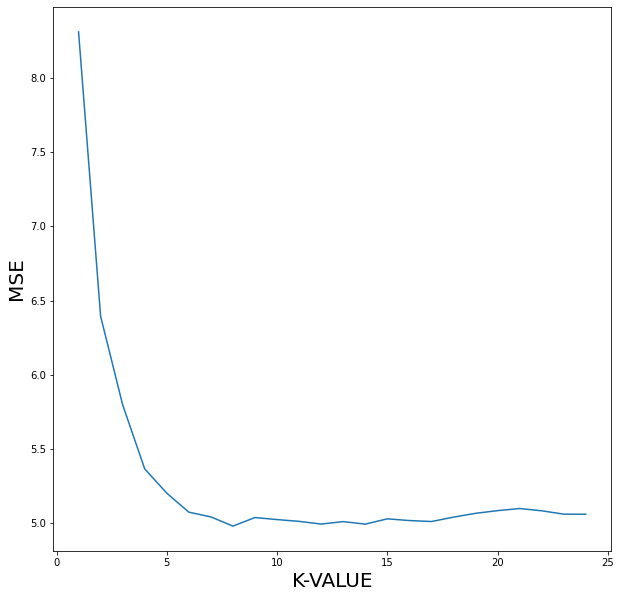

In [227]:
fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,25,1)
knn_dict={} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i), weights= "distance", p = 2)
    model_knn=knn.fit(X_train_standardized,y_train)
    y_knn_pred=model_knn.predict(X_test_standardized)
#Storing MSE 
    mse=mean_squared_error(y_test,y_knn_pred)
    knn_dict[i]=mse
#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE' ,fontsize=20)

Here, the lowest error is `k=7`, so perhaps we can make a model for each and compare.

In [228]:
model = KNeighborsRegressor(n_neighbors=24,p=2,weights="distance")
model.fit(X_train_standardized,y_train)

y_pred = model.predict(X_test_standardized)
model.score(X_test_standardized, y_test)

0.5430104145092629

In [229]:
model2 = KNeighborsRegressor(n_neighbors=7,p=2,weights="distance")
model2.fit(X_train_standardized,y_train)

y_pred = model2.predict(X_test_standardized)
model2.score(X_test_standardized, y_test)

0.5446261074648935

Apparently, the model scores better with `k=7` as compared to `k=24`. It is strange that GridSearch would suggest 24.

In [230]:
# performance = pd.DataFrame({ 'True Value': y_test,
#                             'Prediction': y_pred,
#                             'Error': y_test - y_pred})

# performance